✅ Report saved to: Groww_Portfolio_Report.xlsx
📋 Detected holding columns: ['ISIN Code', 'Company Name', 'Current\nBal', 'Free Bal', 'Pldg Bal', 'DEMAT', 'Safe\nKeep\nBal', 'REMAT', 'Earmark\nBal', 'LockIn', 'Rate', 'Value']


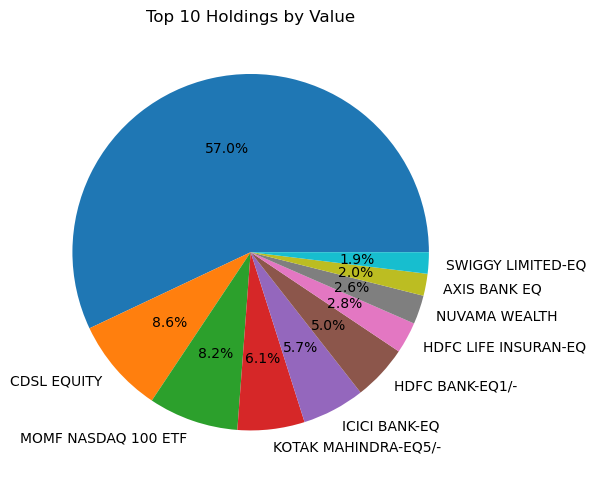

In [3]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
import os

# === CONFIG ===
pdf_path = r"C:\Users\X6\Documents\MBA911\Transactions_Holdings_Statement_2431627552_01-04-2024_25-03-2025.pdf"
password = "DSAPR0992D"  # your PAN in uppercase

def normalize_table(table):
    """Ensure all rows match header length"""
    header = table[0]
    normalized = [header]
    for row in table[1:]:
        if len(row) < len(header):
            row += [""] * (len(header) - len(row))
        elif len(row) > len(header):
            row = row[:len(header)]
        normalized.append(row)
    return normalized

def extract_groww_tables(pdf_path, password):
    statement_data = []
    holding_data = []
    current_section = None

    with pdfplumber.open(pdf_path, password=password) as pdf:
        for i, page in enumerate(pdf.pages):
            text = page.extract_text()
            if not text:
                continue

            if "statement of transaction" in text.lower():
                current_section = "statement"
            elif "holding balance" in text.lower() or "holdings balance" in text.lower():
                current_section = "holding"

            tables = page.extract_tables()
            if not tables:
                continue

            for table in tables:
                # Always keep statement data
                if current_section == "statement":
                    if not statement_data:
                        statement_data = table
                    else:
                        statement_data.extend(table[1:])

                # Only select the real holdings table
                elif current_section == "holding":
                    if "ISIN Code" in table[0]:
                        holding_data = table  # Overwrite to make sure it's the correct one

    return normalize_table(statement_data), normalize_table(holding_data)

def plot_holdings_pie(df_holdings):
    try:
        print("📋 Detected holding columns:", list(df_holdings.columns))

        # Clean column names
        df = df_holdings.rename(columns={
            "Company Name": "Company",
            "Value": "Value"
        })

        # Remove rows with missing company or zero value
        df = df[df["Company"].notna()]
        df["Value"] = df["Value"].astype(float)
        df = df[df["Value"] > 0]

        # Sort and plot top 10
        df_plot = df.groupby("Company")["Value"].sum().sort_values(ascending=False).head(10)
        df_plot.plot.pie(autopct='%1.1f%%', figsize=(6, 6))
        plt.title("Top 10 Holdings by Value")
        plt.ylabel("")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("⚠️ Pie chart error:", e)


def main():
    if not os.path.exists(pdf_path):
        print("❌ File not found.")
        return

    statement, holding = extract_groww_tables(pdf_path, password)

    if not statement:
        print("⚠️ Statement of Transactions NOT FOUND")
    if not holding:
        print("⚠️ Holding Statement NOT FOUND")

    if not statement and not holding:
        print("❌ Failed to extract both tables.")
        return

    if statement:
        df_statement = pd.DataFrame(statement[1:], columns=statement[0])
    if holding:
        df_holdings = pd.DataFrame(holding[1:], columns=holding[0])

    output_file = "Groww_Portfolio_Report.xlsx"
    with pd.ExcelWriter(output_file) as writer:
        if statement:
            df_statement.to_excel(writer, sheet_name="Transactions", index=False)
        if holding:
            df_holdings.to_excel(writer, sheet_name="Holdings", index=False)

    print(f"✅ Report saved to: {output_file}")

    if holding:
        plot_holdings_pie(df_holdings)

if __name__ == "__main__":
    main()


🎯 Fetching tickers: ['ANANTRAJ.NS', 'APARINDS.NS', 'APLAPOLLO.NS', 'AXISBANK.NS', 'CAPLIPOINT.NS', 'CDSL.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'ICICIBANK.NS', 'IDFCFIRSTB.NS', 'KOTAKBANK.NS', 'MOTILALOFS.NS']


[*********************100%***********************]  12 of 12 completed
C:\Users\X6\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\X6\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\X6\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\X6\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\X6\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\X6\anaconda3\Li


📈 Optimized Weights using LinearRegression:
ANANTRAJ.NS      0.01
APARINDS.NS      0.01
APLAPOLLO.NS     0.01
AXISBANK.NS      0.01
CAPLIPOINT.NS    0.01
CDSL.NS          0.13
HDFCBANK.NS      0.20
HDFCLIFE.NS      0.01
ICICIBANK.NS     0.20
IDFCFIRSTB.NS    0.20
KOTAKBANK.NS     0.01
MOTILALOFS.NS    0.20
dtype: float64

📈 Optimized Weights using RandomForest:
ANANTRAJ.NS      0.01
APARINDS.NS      0.01
APLAPOLLO.NS     0.20
AXISBANK.NS      0.01
CAPLIPOINT.NS    0.01
CDSL.NS          0.01
HDFCBANK.NS      0.01
HDFCLIFE.NS      0.20
ICICIBANK.NS     0.20
IDFCFIRSTB.NS    0.13
KOTAKBANK.NS     0.01
MOTILALOFS.NS    0.20
dtype: float64

📈 Optimized Weights using XGBoost:
ANANTRAJ.NS      0.01
APARINDS.NS      0.01
APLAPOLLO.NS     0.20
AXISBANK.NS      0.01
CAPLIPOINT.NS    0.01
CDSL.NS          0.01
HDFCBANK.NS      0.01
HDFCLIFE.NS      0.13
ICICIBANK.NS     0.20
IDFCFIRSTB.NS    0.20
KOTAKBANK.NS     0.01
MOTILALOFS.NS    0.20
dtype: float64



📊 Portfolio Performance Metrics:
Annual Return:       14.39%
CAGR:                12.21%
Volatility:          25.55%
Sharpe Ratio:        0.33
Sortino Ratio:       0.46
Beta:                1.19
Alpha:               6.42%
Max Drawdown:        -24.51%


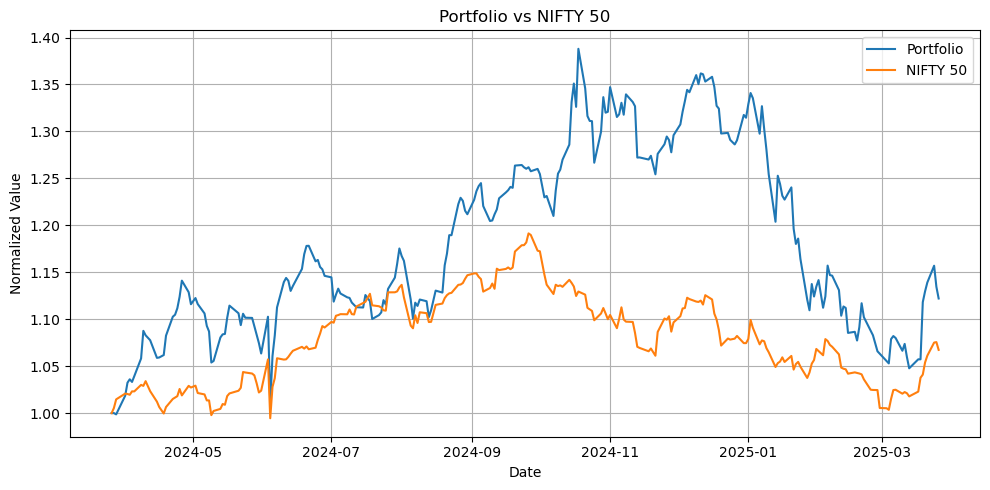

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy.optimize import minimize

# === CONFIG ===
FILE_PATH = r"C:\Users\X6\Documents\MBA911\Groww_Portfolio_Report.xlsx"
HOLDING_SHEET = "Holdings"
ISIN_MAPPING_FILE = r"C:\Users\X6\Documents\MBA911\isin_to_ticker_map.csv"
RISK_FREE_RATE = 0.06  # annual

# === Step 1: Load Holdings ===
df = pd.read_excel(FILE_PATH, sheet_name=HOLDING_SHEET)
df.columns = [col.strip() for col in df.columns]
df = df.rename(columns={
    "ISIN Code": "ISIN",
    "Company Name": "Company",
    "Current\nBal": "Quantity"
})
df = df[["ISIN", "Company", "Quantity"]].dropna()

# === Step 2: Load ISIN-to-Ticker Mapping ===
isin_map_df = pd.read_csv(ISIN_MAPPING_FILE)
isin_map_df.columns = [col.strip() for col in isin_map_df.columns]
isin_to_ticker = dict(zip(isin_map_df["ISIN"], isin_map_df["Ticker"]))

df["ISIN"] = df["ISIN"].astype(str).str.strip()
df["Ticker"] = df["ISIN"].map(isin_to_ticker)
df = df.dropna(subset=["Ticker"])
df["Ticker"] = df["Ticker"].astype(str).str.strip().str.replace("'", "").str.replace(",", "")

# === Step 3: Download Price Data ===
end = datetime.today()
start = end - timedelta(days=365)
tickers = df["Ticker"].tolist()
print("🎯 Fetching tickers:", tickers)

raw_data = yf.download(tickers, start=start, end=end, auto_adjust=True)
prices = raw_data["Close"].ffill().dropna()

if prices.empty:
    print("⚠️ No price data found. Check tickers or market holiday.")
    exit()

# === Step 4: ML-Based Return Prediction ===
returns = prices.pct_change().dropna()
X = returns.shift(1).dropna()
y = returns.loc[X.index]

pred_lr = {}
pred_rf = {}
pred_xgb = {}

for ticker in tickers:
    if ticker in y:
        try:
            X_last = X.iloc[-1].values.reshape(1, -1)

            lr = LinearRegression()
            lr.fit(X, y[ticker])
            pred_lr[ticker] = lr.predict(X_last)[0]

            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            rf.fit(X, y[ticker])
            pred_rf[ticker] = rf.predict(X_last)[0]

            xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
            xgb.fit(X, y[ticker])
            pred_xgb[ticker] = xgb.predict(X_last)[0]
        except Exception as e:
            print(f"⚠️ Skipped {ticker} due to error: {e}")

# === Step 5: Define Optimizer with Constraints ===
def optimize_portfolio(expected_returns, cov_matrix, risk_free_rate=0.06):
    n = len(expected_returns)
    init_weights = np.ones(n) / n

    def portfolio_return(w): return np.dot(w, expected_returns)
    def portfolio_volatility(w): return np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
    def negative_sharpe(w):
        ret = portfolio_return(w)
        vol = portfolio_volatility(w)
        return -1 * (ret - risk_free_rate / 252) / vol

    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = tuple((0.01, 0.2) for _ in range(n))

    result = minimize(negative_sharpe, init_weights, bounds=bounds, constraints=constraints)
    return pd.Series(result.x, index=expected_returns.index)

# === Step 6: Optimize for Each Model ===
models = {
    "LinearRegression": pd.Series(pred_lr).dropna(),
    "RandomForest": pd.Series(pred_rf).dropna(),
    "XGBoost": pd.Series(pred_xgb).dropna()
}

for model_name, expected in models.items():
    print(f"\n📈 Optimized Weights using {model_name}:")
    common = expected.index.intersection(returns.columns)
    cov_matrix = returns[common].cov()
    optimized = optimize_portfolio(expected[common], cov_matrix)
    print(optimized.round(4))

# === (Optional) Use any one model for further performance tracking ===
# Replace below line with expected = models["XGBoost"] or any model you want to use
expected = models["XGBoost"]
weights = optimize_portfolio(expected, returns[expected.index].cov())

# === Step 7: Portfolio Performance ===
common = list(weights.index.intersection(prices.columns))
prices = prices[common]
weights = weights[common]

norm_prices = prices / prices.iloc[0]
portfolio_value = norm_prices.dot(weights)

# === Step 8: Benchmark (NIFTY 50) ===
nifty = yf.download("^NSEI", start=start, end=end, auto_adjust=True)["Close"]
nifty = nifty.ffill().dropna()
nifty_norm = nifty / nifty.iloc[0]

# === Step 9: Metrics ===
port_returns = portfolio_value.pct_change().dropna()
nifty_returns = nifty_norm.pct_change().dropna()
aligned = pd.concat([port_returns, nifty_returns], axis=1).dropna()
aligned.columns = ['Portfolio', 'Benchmark']

sharpe = (aligned['Portfolio'].mean() * 252 - RISK_FREE_RATE) / (aligned['Portfolio'].std() * np.sqrt(252))
sortino = (aligned['Portfolio'].mean() * 252 - RISK_FREE_RATE) / (aligned['Portfolio'][aligned['Portfolio'] < 0].std() * np.sqrt(252))
cov = np.cov(aligned['Portfolio'], aligned['Benchmark'])
beta = cov[0, 1] / np.var(aligned['Benchmark'])
alpha = (aligned['Portfolio'].mean() * 252 - RISK_FREE_RATE) - beta * (aligned['Benchmark'].mean() * 252 - RISK_FREE_RATE)
cagr = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (365 / (portfolio_value.index[-1] - portfolio_value.index[0]).days) - 1
max_drawdown = ((portfolio_value - portfolio_value.cummax()) / portfolio_value.cummax()).min()

# === Step 10: Output ===
print("\n📊 Portfolio Performance Metrics:")
print(f"Annual Return:       {aligned['Portfolio'].mean() * 252:.2%}")
print(f"CAGR:                {cagr:.2%}")
print(f"Volatility:          {aligned['Portfolio'].std() * np.sqrt(252):.2%}")
print(f"Sharpe Ratio:        {sharpe:.2f}")
print(f"Sortino Ratio:       {sortino:.2f}")
print(f"Beta:                {beta:.2f}")
print(f"Alpha:               {alpha:.2%}")
print(f"Max Drawdown:        {max_drawdown:.2%}")

# === Step 11: Export ===
metrics = {
    "Annual Return": aligned['Portfolio'].mean() * 252,
    "CAGR": cagr,
    "Volatility": aligned['Portfolio'].std() * np.sqrt(252),
    "Sharpe Ratio": sharpe,
    "Sortino Ratio": sortino,
    "Beta": beta,
    "Alpha": alpha,
    "Max Drawdown": max_drawdown
}
pd.DataFrame(metrics, index=["Value"]).T.to_csv("portfolio_metrics.csv")

# === Step 12: Plot ===
plt.figure(figsize=(10, 5))
plt.plot(portfolio_value / portfolio_value.iloc[0], label="Portfolio")
plt.plot(nifty_norm[nifty_norm.index.isin(portfolio_value.index)], label="NIFTY 50")
plt.title("Portfolio vs NIFTY 50")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
